In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df = pd.read_excel("WEOOct2023all.xlsx")
df = df[(df["Country"] == "Russia") | (df["Country"] == "India")]

In [18]:
rus_gdp = df[(df["Country"] == "Russia") & (df["WEO Subject Code"] == "NGDP_RPCH")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = df[(df["Country"] == "India") & (df["WEO Subject Code"] == "NGDP_RPCH")].loc[:, 1992:2022].iloc[0, :]

ind_gdp.to_numpy()

ind_gdp.index.to_numpy()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=object)

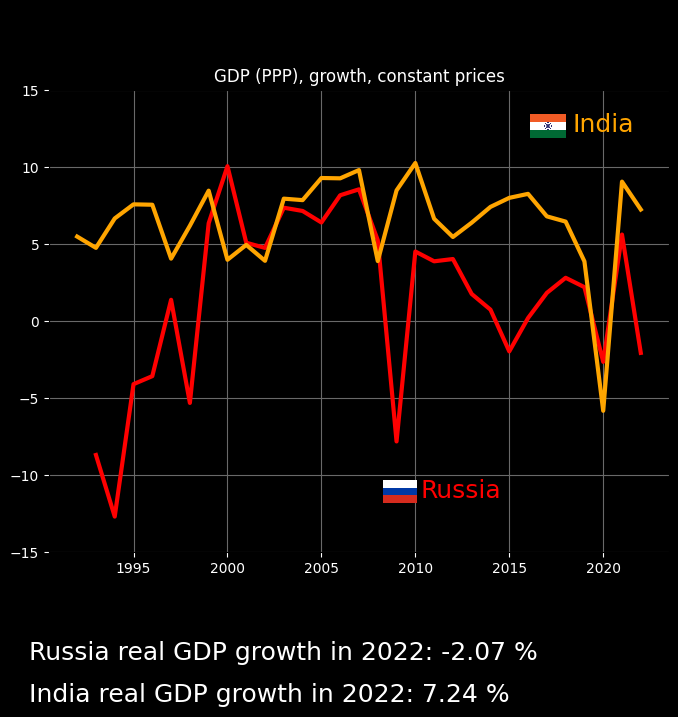

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index, rus_gdp, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index, ind_gdp, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.7 - 0.2, 0.365 + 0.01), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.685, 0.775 + 0.21), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

ax.set_ylim(-15, 15)

fig.text(0.79 - 0.2, 0.2, 'Russia', color='red', fontsize=18)
fig.text(0.78, 0.81, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia real GDP growth in 2022: {rus_gdp[2022]} %', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India real GDP growth in 2022: {ind_gdp[2022]} %', color='white', fontsize=18)

plt.title("GDP (PPP), growth, constant prices")
plt.grid(True, color='dimgrey')

plt.savefig("world_data_real_gdp_growth.png", bbox_inches='tight')
plt.show()

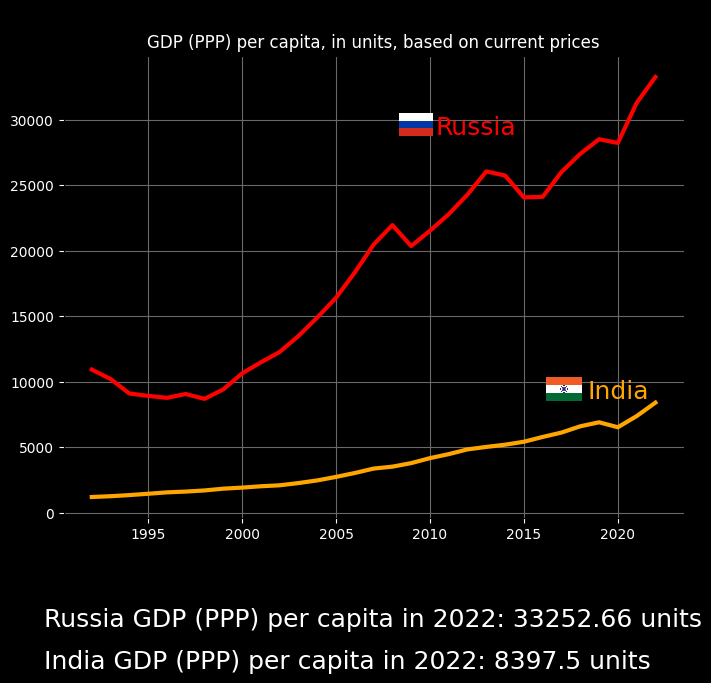

In [45]:
rus_gdp = df[(df["Country"] == "Russia") & (df["WEO Subject Code"] == "PPPPC")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = df[(df["Country"] == "India") & (df["WEO Subject Code"] == "PPPPC")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = ind_gdp.str.replace(",", "")

ind_gdp = ind_gdp.astype(float)

rus_gdp = rus_gdp.str.replace(",", "")

rus_gdp = rus_gdp.astype(float)

ind_gdp.to_numpy()

ind_gdp.index.to_numpy()


fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index, rus_gdp, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index, ind_gdp, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.7 - 0.18, 0.365 + 0.015 + 0.55), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.685 + 0.02, 0.775 + 0.215 - 0.5), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)


fig.text(0.79 - 0.2, 0.2 + 0.55, 'Russia', color='red', fontsize=18)
fig.text(0.78, 0.81 - 0.5, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP (PPP) per capita in 2022: {rus_gdp[2022]} units', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP (PPP) per capita in 2022: {ind_gdp[2022]} units', color='white', fontsize=18)

plt.title("GDP (PPP) per capita, in units, based on current prices")
plt.grid(True, color='dimgrey')

plt.savefig("world_data_gdpppp_per_capita.png", bbox_inches='tight')
plt.show()

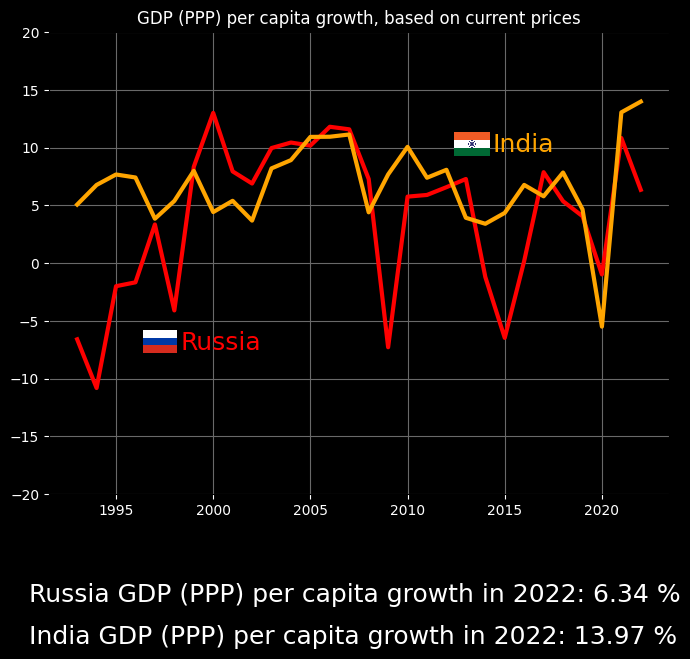

In [46]:
rus_growth = ((rus_gdp.to_numpy()[1:] - rus_gdp.to_numpy()[:-1]) / rus_gdp.to_numpy()[:-1]) * 100

ind_growth = ((ind_gdp.to_numpy()[1:] - ind_gdp.to_numpy()[:-1]) / ind_gdp.to_numpy()[:-1]) * 100

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index[1:], rus_growth, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index[1:], ind_growth, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.70 - 0.5, 0.365 + 0.16 + 0.003), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.69 - 0.1, 0.775 + 0.06 + 0.023), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

ax.set_ylim(-20, 20)

fig.text(0.79 - 0.5, 0.35, 'Russia', color='red', fontsize=18)
fig.text(0.78 - 0.1, 0.66 + 0.02, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP (PPP) per capita growth in 2022: {rus_growth[-1]:.2f} %', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP (PPP) per capita growth in 2022: {ind_growth[-1]:.2f} %', color='white', fontsize=18)

plt.title("GDP (PPP) per capita growth, based on current prices")
plt.grid(True, color="dimgrey")

plt.savefig("world_data_ppppc_growth.png", bbox_inches='tight')
plt.savefig("world_data_ppppc_growth.pdf", bbox_inches='tight')
plt.show()


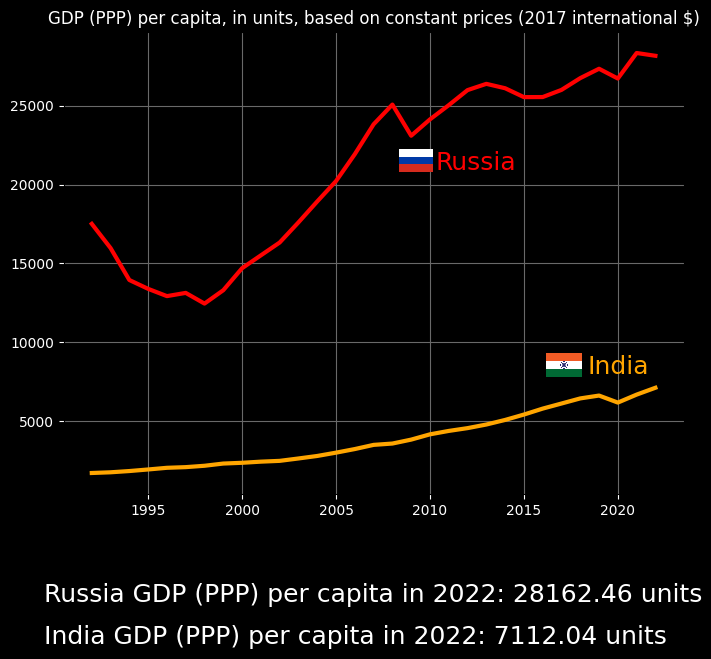

In [49]:
rus_gdp = df[(df["Country"] == "Russia") & (df["WEO Subject Code"] == "NGDPRPPPPC")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = df[(df["Country"] == "India") & (df["WEO Subject Code"] == "NGDPRPPPPC")].loc[:, 1992:2022].iloc[0, :]

ind_gdp = ind_gdp.str.replace(",", "")

ind_gdp = ind_gdp.astype(float)

rus_gdp = rus_gdp.str.replace(",", "")

rus_gdp = rus_gdp.astype(float)

ind_gdp.to_numpy()

ind_gdp.index.to_numpy()


fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index, rus_gdp, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index, ind_gdp, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.7 - 0.18, 0.365 + 0.015 + 0.45), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.685 + 0.02, 0.775 + 0.215 - 0.5), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)


fig.text(0.79 - 0.2, 0.2 + 0.45, 'Russia', color='red', fontsize=18)
fig.text(0.78, 0.81 - 0.5, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP (PPP) per capita in 2022: {rus_gdp[2022]} units', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP (PPP) per capita in 2022: {ind_gdp[2022]} units', color='white', fontsize=18)

plt.title("GDP (PPP) per capita, in units, based on constant prices (2017 international $)")
plt.grid(True, color='dimgrey')

plt.savefig("world_data_gdpppp_per_capita_const.png", bbox_inches='tight')
plt.show()

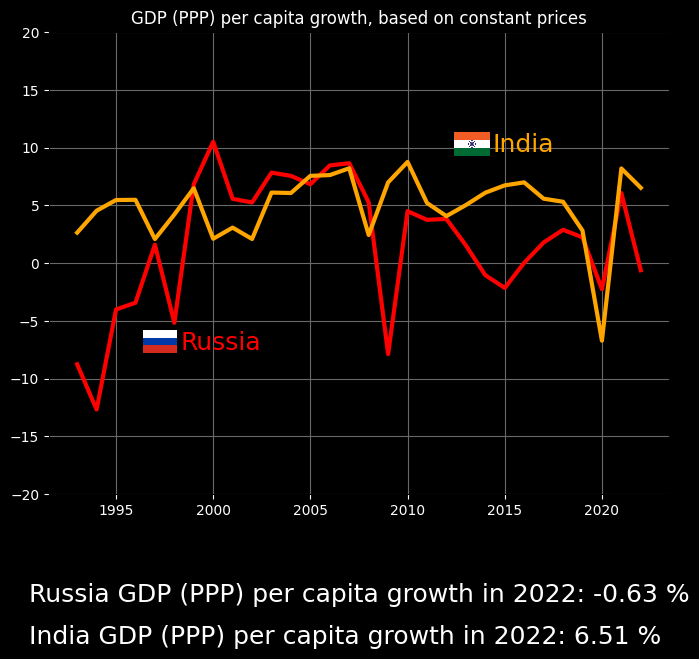

In [50]:
rus_growth = ((rus_gdp.to_numpy()[1:] - rus_gdp.to_numpy()[:-1]) / rus_gdp.to_numpy()[:-1]) * 100

ind_growth = ((ind_gdp.to_numpy()[1:] - ind_gdp.to_numpy()[:-1]) / ind_gdp.to_numpy()[:-1]) * 100

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index[1:], rus_growth, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index[1:], ind_growth, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.70 - 0.5, 0.365 + 0.16 + 0.003), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.69 - 0.1, 0.775 + 0.06 + 0.023), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

ax.set_ylim(-20, 20)

fig.text(0.79 - 0.5, 0.35, 'Russia', color='red', fontsize=18)
fig.text(0.78 - 0.1, 0.66 + 0.02, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia GDP (PPP) per capita growth in 2022: {rus_growth[-1]:.2f} %', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India GDP (PPP) per capita growth in 2022: {ind_growth[-1]:.2f} %', color='white', fontsize=18)

plt.title("GDP (PPP) per capita growth, based on constant prices")
plt.grid(True, color="dimgrey")

plt.savefig("world_data_ppppc_const_growth.png", bbox_inches='tight')
plt.savefig("world_data_ppppc_const_growth.pdf", bbox_inches='tight')
plt.show()

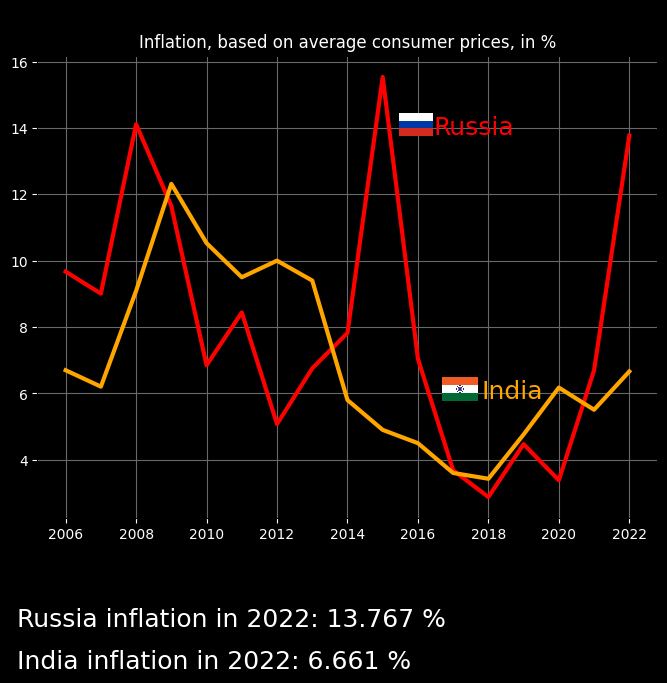

In [58]:
rus_gdp = df[(df["Country"] == "Russia") & (df["WEO Subject Code"] == "PCPIPCH")].loc[:, 2006:2022].iloc[0, :]

ind_gdp = df[(df["Country"] == "India") & (df["WEO Subject Code"] == "PCPIPCH")].loc[:, 2006:2022].iloc[0, :]

ind_gdp.to_numpy()

ind_gdp.index.to_numpy()


fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.plot(rus_gdp.index, rus_gdp, linewidth=3, label="Russia", color="red")
ax.plot(ind_gdp.index, ind_gdp, linewidth=3, label="India", color="orange")
ax.title.set_color('white')

img = plt.imread('rus.png')
imagebox = OffsetImage(img, zoom=0.03)
rusim = AnnotationBbox(imagebox, (0.7 - 0.18, 0.365 + 0.015 + 0.55), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)

img = plt.imread('ind.png')
imagebox = OffsetImage(img, zoom=0.02)
rusim = AnnotationBbox(imagebox, (0.685 + 0.02 - 0.13, 0.775 + 0.215 - 0.5), xycoords='figure fraction', frameon=False)
ax.add_artist(rusim)


fig.text(0.79 - 0.17, 0.2 + 0.55, 'Russia', color='red', fontsize=18)
fig.text(0.78 - 0.1, 0.81 - 0.5, 'India', color='orange', fontsize=18)

fig.text(0.1, -0.07, f'Russia inflation in 2022: {rus_gdp[2022]} %', color='white', fontsize=18)
fig.text(0.1, -0.14, f'India inflation in 2022: {ind_gdp[2022]} %', color='white', fontsize=18)

plt.title("Inflation, based on average consumer prices, in %")
plt.grid(True, color='dimgrey')

plt.savefig("world_data_inlfation.png", bbox_inches='tight')
plt.show()